In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('seaborn')    # plt seaborn 스타일
sns.set(font_scale=2.5)      # size 2.5로 통일

import missingno as msno    # data에 채워지지 않은 것을 채우기 위해 import

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
# 비어 있는 데이터에 대해서 처리를 먼저 해주어야 한다.

df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [2]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.describe() # 각 feature에 대해 count, mean, std, min ... max 를 알려준다.
                    # count의 경우 숫자가 그냥 갯수를 세는데 숫자가 적은 경우 NULL 값이 있다는 것을 말한다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaNValue: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0])) # {:>10} 오른쪽 정렬 의미
                                # df_train[col]은 pandas의 시리즈 type .isnull null 이면
                                # isnull = True or False 인데 sum으로 True를 1로 다더함
    print(msg)

column: PassengerId	 Percent of NaNValue: 0.00%
column:   Survived	 Percent of NaNValue: 0.00%
column:     Pclass	 Percent of NaNValue: 0.00%
column:       Name	 Percent of NaNValue: 0.00%
column:        Sex	 Percent of NaNValue: 0.00%
column:        Age	 Percent of NaNValue: 19.87%
column:      SibSp	 Percent of NaNValue: 0.00%
column:      Parch	 Percent of NaNValue: 0.00%
column:     Ticket	 Percent of NaNValue: 0.00%
column:       Fare	 Percent of NaNValue: 0.00%
column:      Cabin	 Percent of NaNValue: 77.10%
column:   Embarked	 Percent of NaNValue: 0.22%


In [6]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaNValue: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0])) # {:>10} 오른쪽 정렬 의미
                                # df_train[col]은 pandas의 시리즈 type .isnull null 이면
                                # isnull = True or False 인데 sum으로 True를 1로 다더함
    print(msg)

column: PassengerId	 Percent of NaNValue: 0.00%
column:     Pclass	 Percent of NaNValue: 0.00%
column:       Name	 Percent of NaNValue: 0.00%
column:        Sex	 Percent of NaNValue: 0.00%
column:        Age	 Percent of NaNValue: 20.57%
column:      SibSp	 Percent of NaNValue: 0.00%
column:      Parch	 Percent of NaNValue: 0.00%
column:     Ticket	 Percent of NaNValue: 0.00%
column:       Fare	 Percent of NaNValue: 0.24%
column:      Cabin	 Percent of NaNValue: 78.23%
column:   Embarked	 Percent of NaNValue: 0.00%


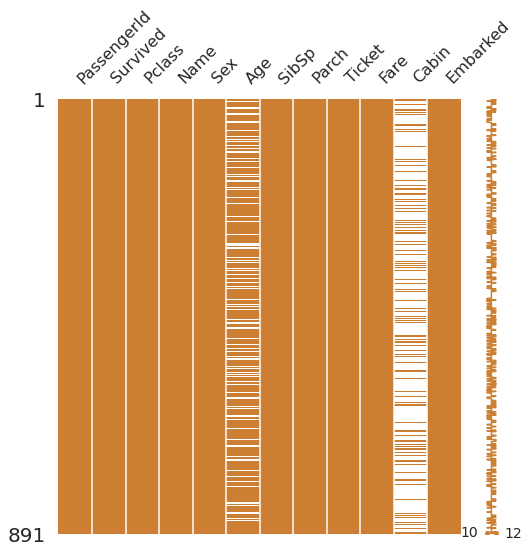

In [7]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))
# iloc은 panda의 문법으로 col, row 범위를 설정해 잘라주는 것, figsize 크기, color RGB색깔

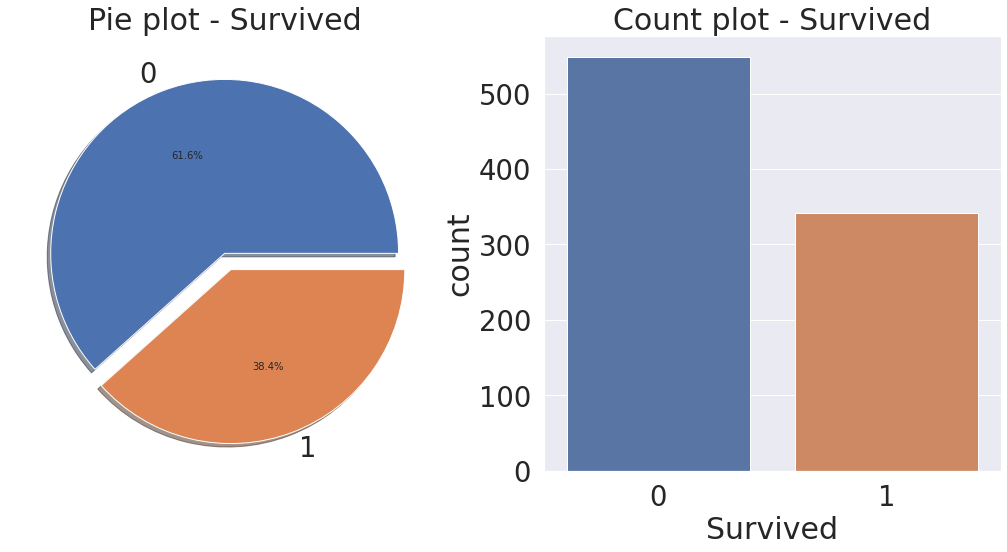

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
#
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
# explode 원판 간격 째는거, autopct %형식을 말해주는 것, ax = ax[i], shadow
# plt.plot(df_train['Survived'].value_counts())
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
# Column, 어떤 데이터 셋, 도화지의 두번째
ax[1].set_title('Count plot - Survived')
plt.show()

In [9]:
print(df_train['Survived'].value_counts()) # series 가 어떻게 구성되어있는지 feature와 해당 갯수, 데이터 Type 구해줌

0    549
1    342
Name: Survived, dtype: int64


2.1 Pclass

In [10]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).count()
# as_index = False -> 기존에 Pclass 자체가 index로 사용이 되는데 index를 따로 만들어서 써라!!
# Pclass로 Survived를 묶는다, Count : Pclass가 1인 Survivied의 갯수

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [11]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).sum()
# df_train['Survived'].unique() # array([0, 1])
# Pclass로 Survivied를 묶는다, Sum : Pclass는 0 또는 1 이다 이것의 합을 의미 -> 실제 생존자수
# .mean() -> sum()에 대한 평균을 의미 -> 각 Pclass별 생존율을 알 수 있음

,Pclass,Survived
0,1,136
1,2,87
2,3,119


In [12]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).count()

Survived
0      4
1      4
All    4
dtype: int64

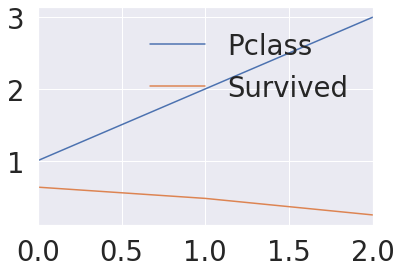

In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False).plot()
# 끝에 .plot()을 붙이면 그래프 형식 안붙이면 표 형식
# .sort_values(by = '칼럼', ascending = 오름차순 True, 내림차순 False)

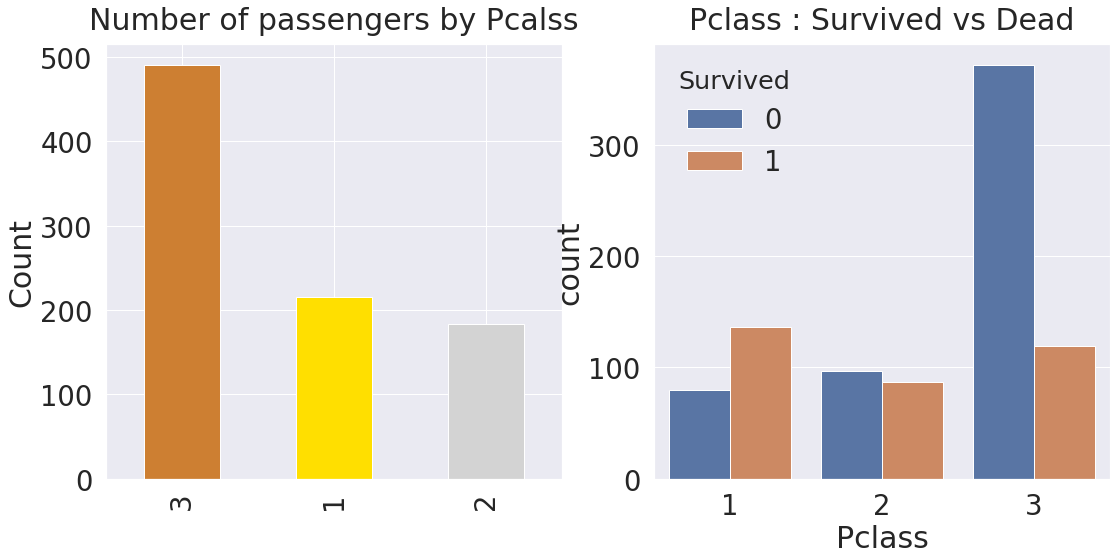

In [14]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
# 단순히 Pclass 갯수를 보여주는 bar 그래프가 된다.
ax[0].set_title('Number of passengers by Pcalss', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
# Pcalss 별로 분류하지만 hue = 'Survived'로 Survived에 대해서 각 분류결과를 더 자세히 보여줌
ax[1].set_title('Pclass : Survived vs Dead', y=y_position)
plt.show()

2.2 Sex

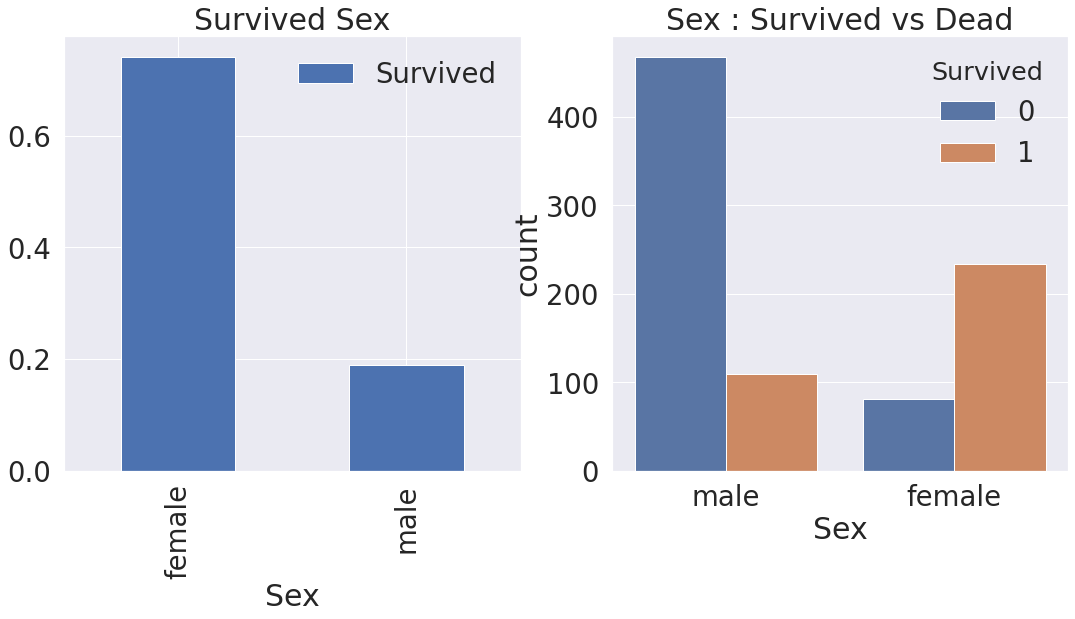

In [15]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
# sns.countplot 1.첫번째 기준 2.두번째 기준 3.data= 4.ax=
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

In [16]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
# 평균을 구하는 순간 성별의 생존확률이된다. 왜일까 

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')
# margins 은 합친 결과를 보여주냐 마느냐 Column All이 추가된다!

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [18]:
# Both Sex and Pclass

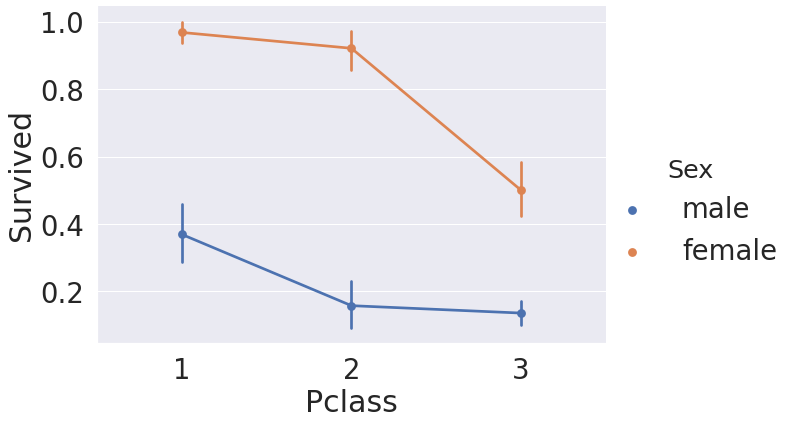

In [19]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)
# factor plot   X축        Y축        hue 색깔      data=        size=    aspect=

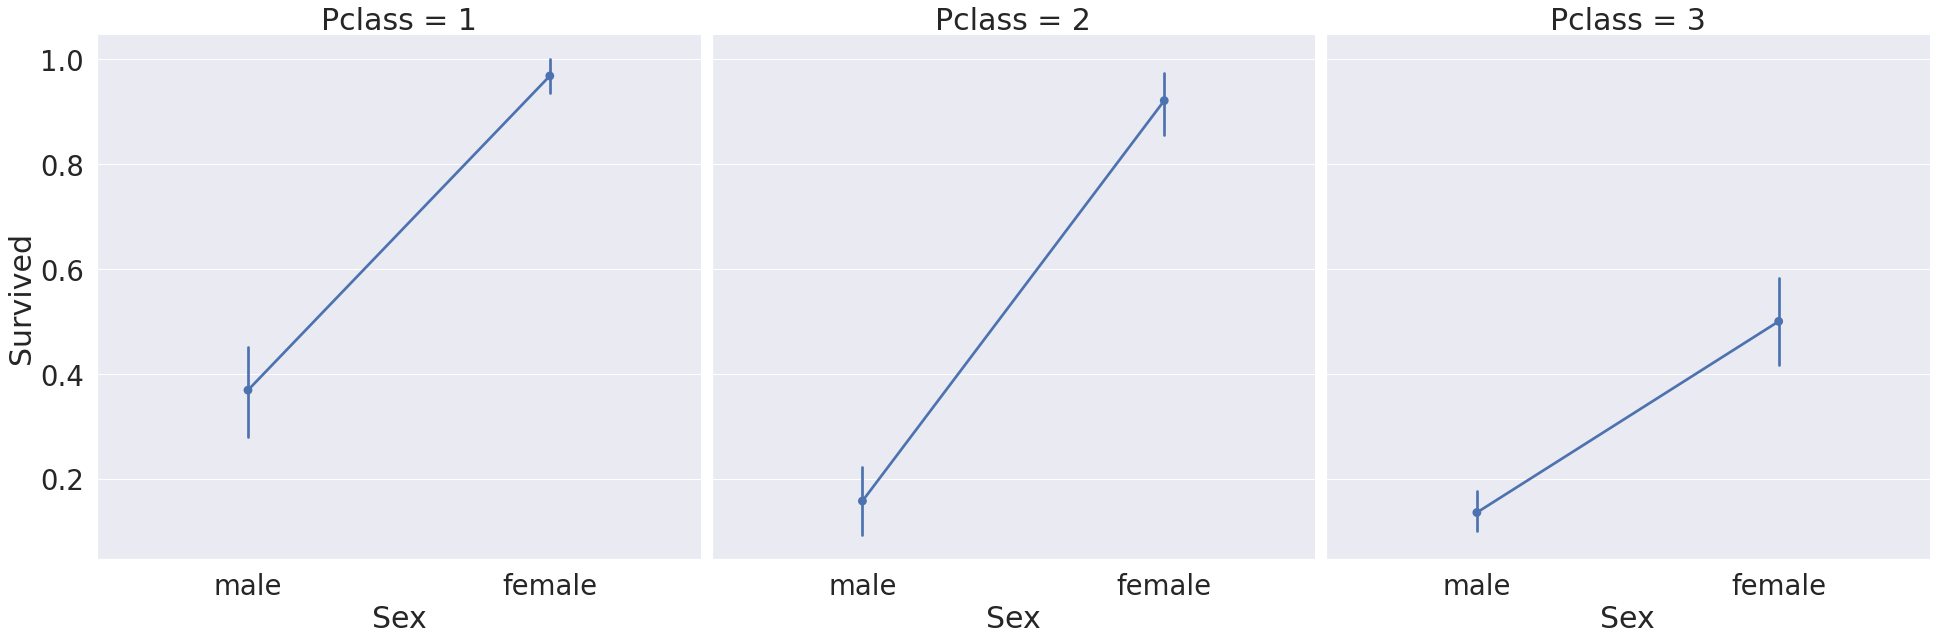

In [20]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, saturation=.5, size=9, aspect=1)
# col을쓰냐 hue를 쓰냐에 따라 한그림에서 그래프를 볼수도있고 col 처럼 다르게 볼수도 있음!!

In [21]:
# Age

In [22]:
print('나이 max : {:.1f} years'.format(df_train['Age'].max()))
print('나이 min : {:.1f} years'.format(df_train['Age'].min()))
print('나이 평균 : {:.1f} years'.format(df_train['Age'].mean()))


나이 max : 80.0 years
나이 min : 0.4 years
나이 평균 : 29.7 years


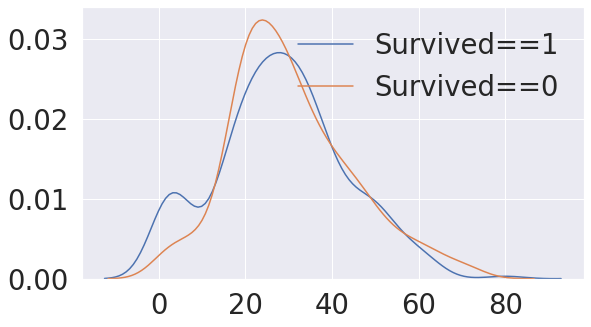

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
# df_train[df_train['Survived']==1] 이렇게 bool 값을 넣게 되면 True에 해당하는 값만 시리즈에서 가져오게 된다.
# 이때 ['Age']를 붙이지 않으면 다가져오는거고 ['Age']를 붙이면 Age column에 해당하는 값을 가져오는거!!
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived==1', 'Survived==0'])
plt.show()

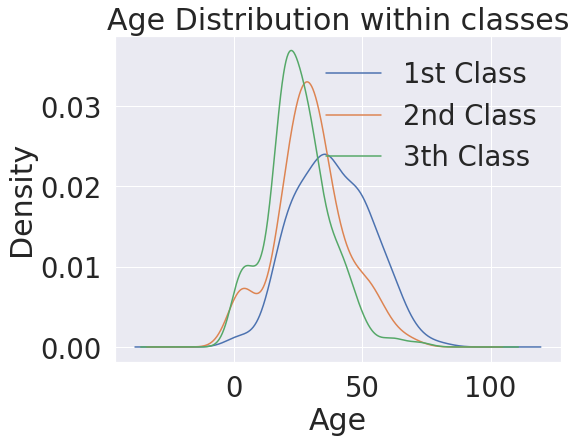

In [24]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')
# [X축][Y축]
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3th Class'])
# plt는 xlabel, ax는 set_xlabel 이다!

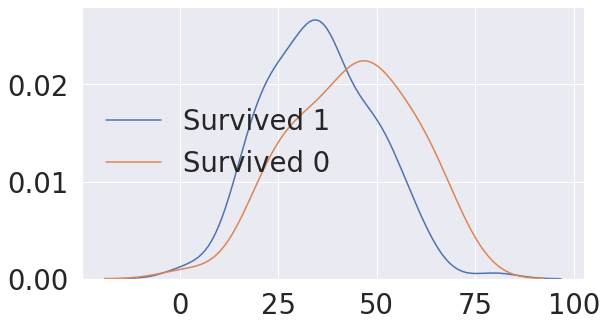

In [25]:
flg, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived']==1)&(df_train['Pclass']==1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==0)&(df_train['Pclass']==1)]['Age'], ax=ax)
plt.legend(['Survived 1', 'Survived 0'])
plt.show()

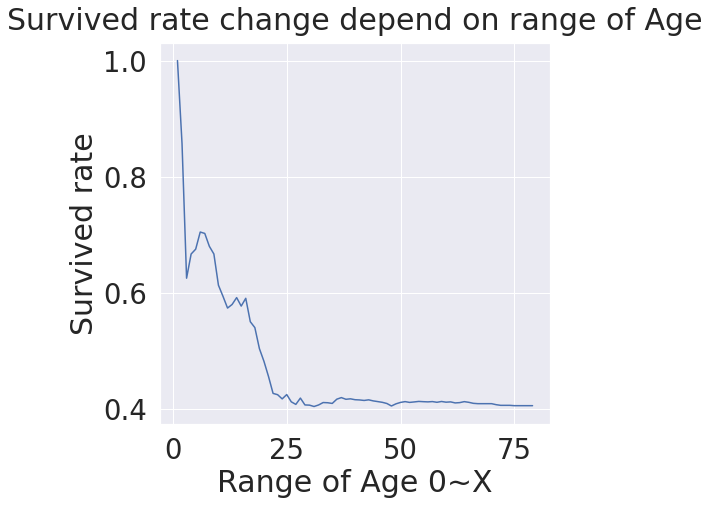

In [26]:
change_age_range_survive_ratio = []
for i in range(0, 80):
    change_age_range_survive_ratio.append(df_train[df_train['Age']<i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived']))
plt.figure(figsize=(7, 7))
plt.plot(change_age_range_survive_ratio)
# plot은 어떤 리스트(배열)을 도화지에 놓는 기능이라고 보면 되겠다!
plt.title('Survived rate change depend on range of Age', y=1.02)
plt.ylabel('Survived rate')
plt.xlabel('Range of Age 0~X')
plt.show()


In [27]:
# Pclass, Age, Survived

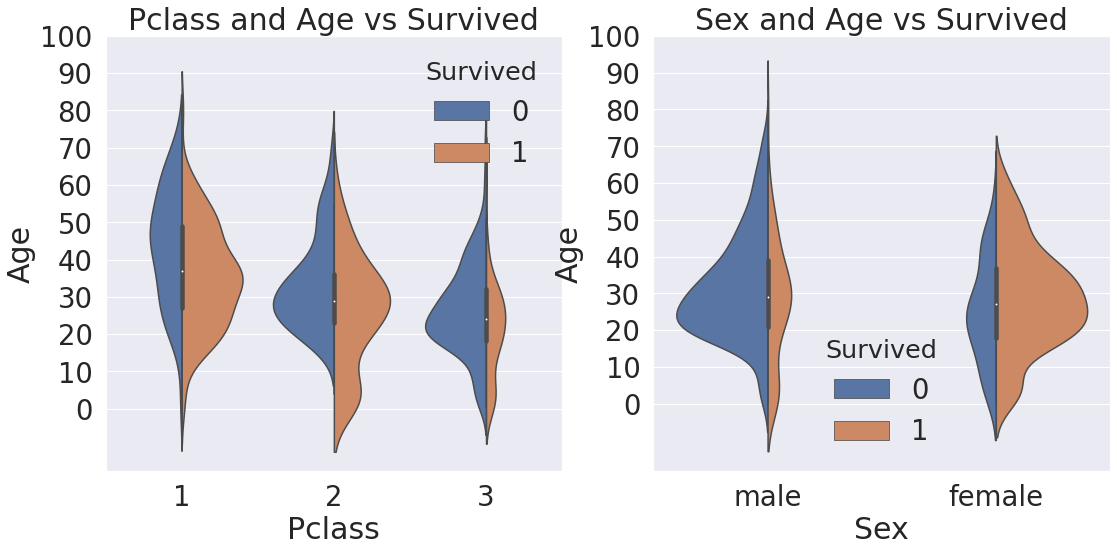

In [28]:
# seaborn의 바이올린plot?
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
# scale='area'의 경우 영역의 넓이를 동일학 출력한다
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
# y좌표 Age값 0~110, 10단위로 끊어서 출력

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [29]:
# Embarked

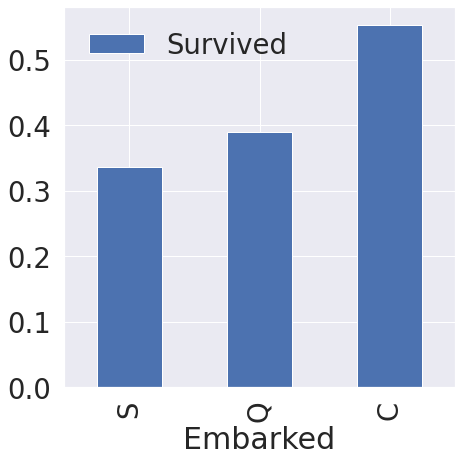

In [30]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived').plot.bar(ax=ax)
#sort_index() 도 가능하다 Embarked : C S Q 순으로 정렬됨

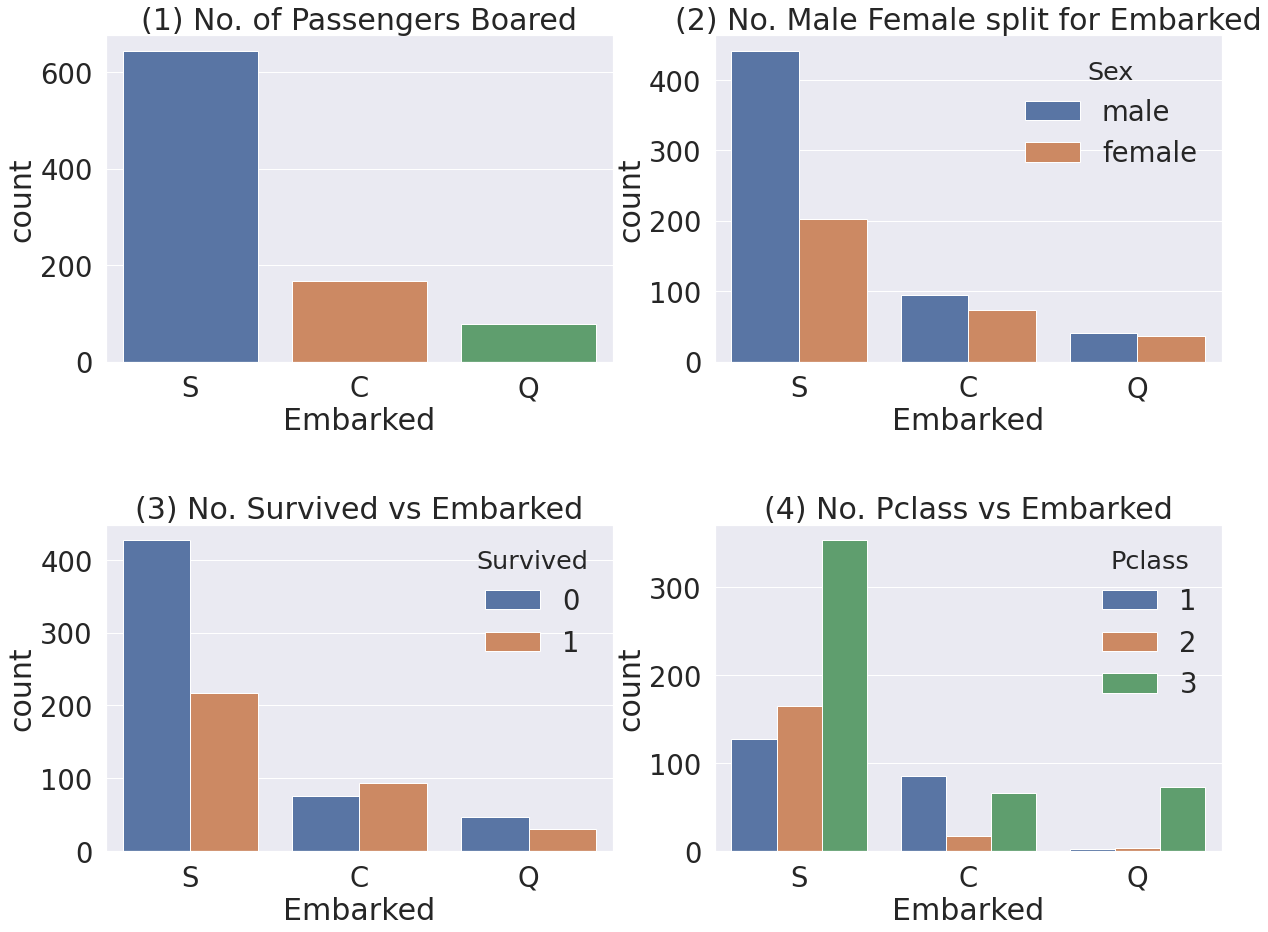

In [31]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. of Passengers Boared')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) No. Male Female split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) No. Survived vs Embarked')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) No. Pclass vs Embarked')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
# subplots_adjust wspace, hspace subplot사이간 w, h
plt.show()

In [32]:
# SibSp : 형제,자매,배우자 Parch : 자식들

In [33]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
#위와 같이 Pandas series는 연산이 가능하다 (+, -, *, / ...)

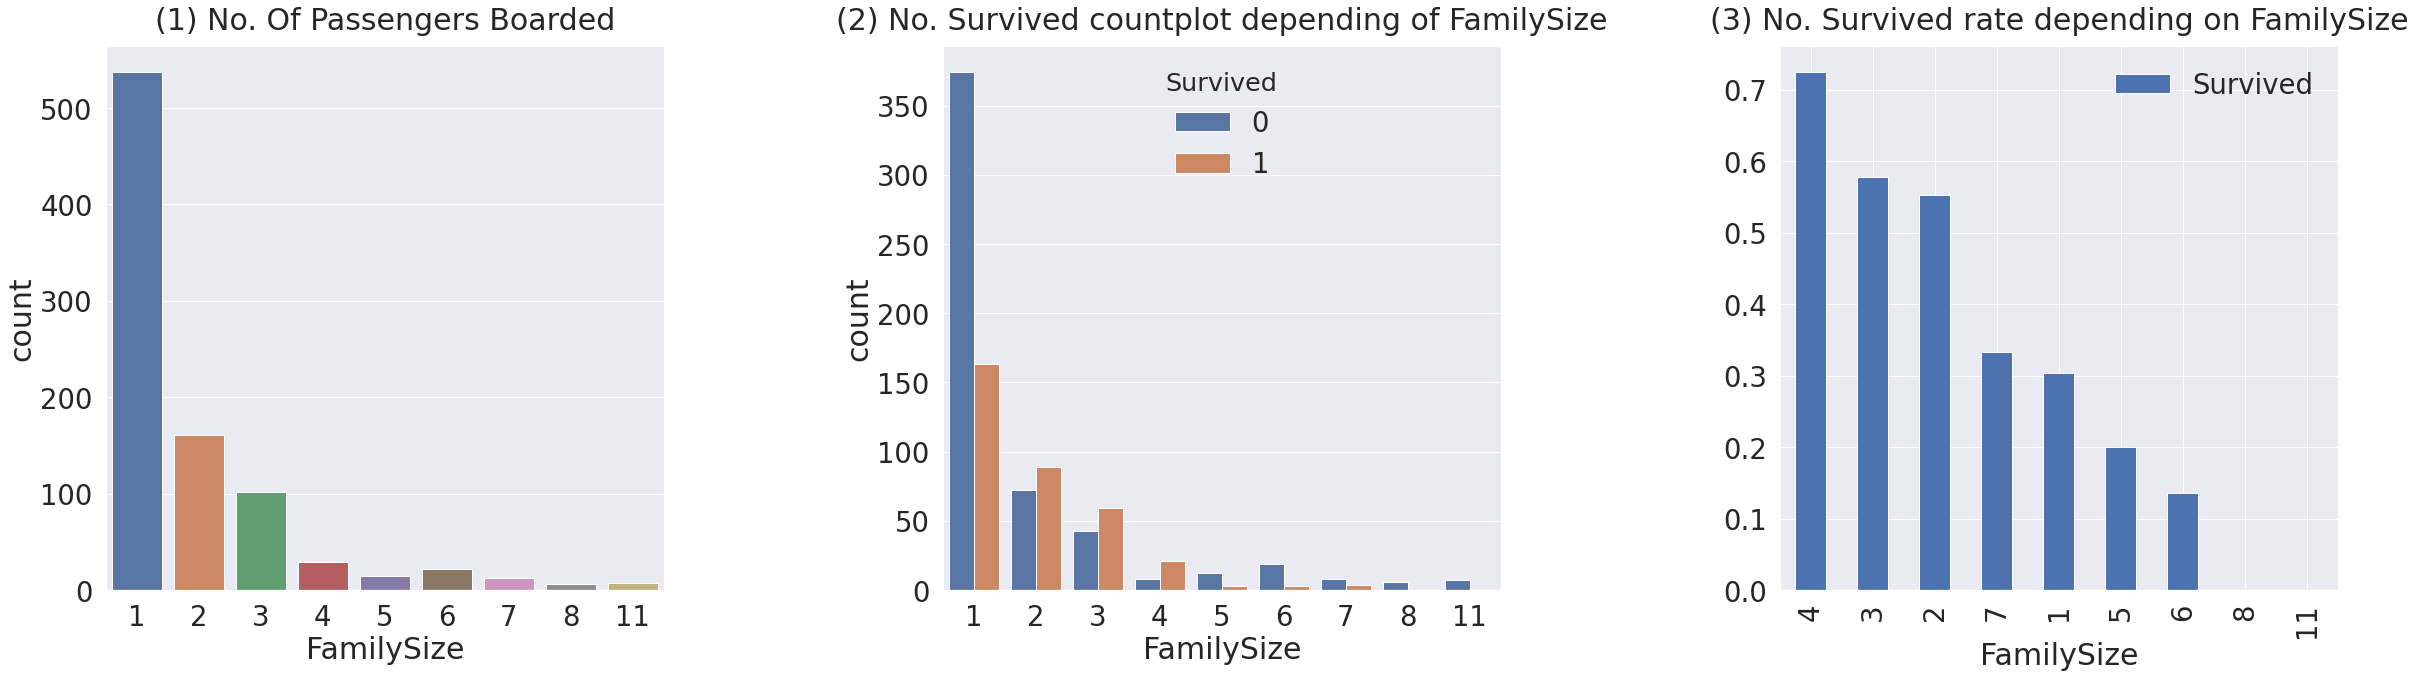

In [34]:
f, ax = plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)
sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) No. Survived countplot depending of FamilySize', y=1.02)
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) No. Survived rate depending on FamilySize', y=1.02)
#sort_values는 ( by='', ascending=T or F) 가 들어간다!
plt.subplots_adjust(hspace=0.2, wspace=0.5)
plt.show()

In [35]:
# DEA : Fare 탑승요금 continous, Cabin, Ticket

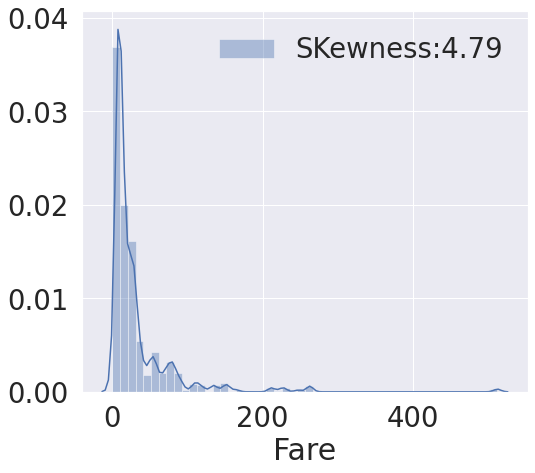

In [36]:
flt, ax = plt.subplots(1, 1, figsize=(8, 7))
g = sns.distplot(df_train['Fare'],color='b', label='SKewness:{:.2f}'.format(df_train['Fare'].skew()), ax=ax)
#distplot : 시리즈를 넣으면 히스토그램 그려주는 함수, skew() : 히스토그램이 얼마나 쏠렸냐, 비대칭이냐!
g = g.legend(loc='best')
#SKewness : 왜도 -> 양수면 좌측으로 쏠린거고, 음수면 우측
#뾰족한정도 : 첨도 -> 양수면 뾰족, 음수면 평평, 0은 가우시안?

In [37]:
#df_train[Fare]에 값이 0보다 크면 log를 취한것을 maping한다
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
#Fare값 자체에 log를 씌워줌으서 Skewness를 줄여준다.

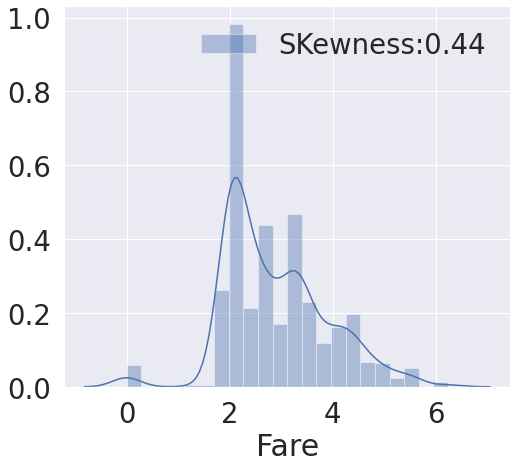

In [38]:
flt, ax = plt.subplots(1, 1, figsize=(8, 7))
g = sns.distplot(df_train['Fare'],color='b', label='SKewness:{:.2f}'.format(df_train['Fare'].skew()), ax=ax)
#distplot : 시리즈를 넣으면 히스토그램 그려주는 함수, skew() : 히스토그램이 얼마나 쏠렸냐, 비대칭이냐!
g = g.legend(loc='best')

In [39]:
df_train['Ticket'].value_counts() #value_counts 예시 항상 볼 것

347082               7
1601                 7
CA. 2343             7
CA 2144              6
3101295              6
                    ..
239856               1
113043               1
350050               1
PC 17473             1
STON/O 2. 3101285    1
Name: Ticket, Length: 681, dtype: int64

In [40]:
#Feature engineering Fill Null in Age

In [41]:
df_train['Age'].isnull().sum() # 177개의 Null
df_train['Name'].str # String으로 형변환됨
df_train['Name'].str.extract('([A-Za-z]*)\.') # character한개이상 뒤에 . 이 붙은것 Mr, Mrs, Miss ...
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]*)\.')
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]*)\.')
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [42]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)
#replace로 Initial 통일, inplace=True는 바로 replace 해주겠다
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)
df_train.groupby(['Initial']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


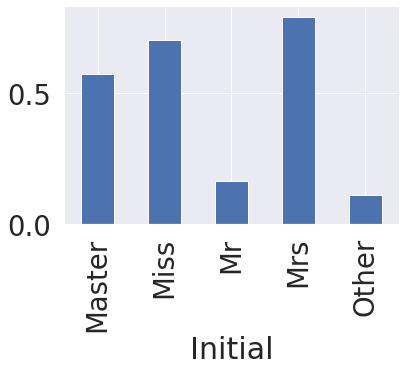

In [43]:
df_train.groupby(['Initial'])['Survived'].mean().plot.bar()

In [44]:
df_all = pd.concat([df_train, df_test]) # pd.concat 트레인 셋과 테스트 셋을 합침
df_all.reset_index() # 기존index로 그대로 합쳐지는데 합친뒤 index를 새로 매김

,index,Age,Cabin,Embarked,FamilySize,Fare,Initial,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,0,22.0,NaN,S,2,1.981001,Mr,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,1,38.0,C85,C,2,4.266662,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,2,26.0,NaN,S,1,2.070022,Miss,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,3,35.0,C123,S,2,3.972177,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,4,35.0,NaN,S,1,2.085672,Mr,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,NaN,NaN,S,1,2.085672,Mr,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,414,39.0,C105,C,1,4.690430,Mr,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,415,38.5,NaN,S,1,1.981001,Mr,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,416,NaN,NaN,S,1,2.085672,Mr,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [45]:
df_all.groupby(['Initial']).mean()

,Age,FamilySize,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Initial,,,,,,,,
Master,5.482642,4.426230,3.262225,1.377049,658.852459,2.655738,2.049180,0.575000
Miss,21.834533,2.147170,3.065227,0.494340,616.992453,2.332075,0.652830,0.704301
Mr,32.556397,1.446174,2.676067,0.159533,658.831388,2.359274,0.286641,0.162571
Mrs,37.034884,2.482412,3.488188,0.824121,685.673367,1.929648,0.658291,0.795276
Other,44.923077,1.384615,2.951897,0.153846,714.923077,1.615385,0.230769,0.111111


In [46]:
# df_train.loc[1, :]  # 두번째 row의 전체 column을 가져온다.
# df_train.loc[df_train['Survived']==1] # Survived가 1인 것을 모두 들고온다.
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Mr'), 'Age']=33
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Mrs'), 'Age']=37
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Miss'), 'Age']=21
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Master'), 'Age']=5
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Other'), 'Age']=45
# loc 활용하는거 보기!
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Mr'), 'Age']=33
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Mrs'), 'Age']=37
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Miss'), 'Age']=21
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Master'), 'Age']=5
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Other'), 'Age']=45
# df_train['Age'].isnull().sum()
df_test['Age'].isnull().sum()

0

In [47]:
# Embarked
df_train['Embarked'].isnull().sum()

2

In [48]:
df_train['Embarked'].fillna('S', inplace=True)
df_test['Fare'].fillna(0, inplace=True)

In [49]:
df_train['Age_cat'] = 0
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [50]:
df_train.loc[df_train['Age']<10, 'Age_cat'] = 0
df_train.loc[(df_train['Age']>=10)&(df_train['Age']<20), 'Age_cat'] = 1
df_train.loc[(df_train['Age']>=20)&(df_train['Age']<30), 'Age_cat'] = 2
df_train.loc[(df_train['Age']>=30)&(df_train['Age']<40), 'Age_cat'] = 3
df_train.loc[(df_train['Age']>=40)&(df_train['Age']<50), 'Age_cat'] = 4
df_train.loc[(df_train['Age']>=50)&(df_train['Age']<60), 'Age_cat'] = 5
df_train.loc[(df_train['Age']>=60)&(df_train['Age']<70), 'Age_cat'] = 6
df_train.loc[df_train['Age']>=70, 'Age_cat'] = 7
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [51]:
#함수로 하는 방식은 .apply(함수) 로 적용!
def category_Age(x):
    if x<10:
        return 0
    if x<20:
        return 1
    if x<30:
        return 2
    if x<40:
        return 3
    if x<50:
        return 4
    if x<60:
        return 5
    if x<70:
        return 6
    else:
        return 7

In [52]:
df_test.loc[df_test['Age']<10, 'Age_cat'] = 0
df_test.loc[(df_test['Age']>=10)&(df_test['Age']<20), 'Age_cat'] = 1
df_test.loc[(df_test['Age']>=20)&(df_test['Age']<30), 'Age_cat'] = 2
df_test.loc[(df_test['Age']>=30)&(df_test['Age']<40), 'Age_cat'] = 3
df_test.loc[(df_test['Age']>=40)&(df_test['Age']<50), 'Age_cat'] = 4
df_test.loc[(df_test['Age']>=50)&(df_test['Age']<60), 'Age_cat'] = 5
df_test.loc[(df_test['Age']>=60)&(df_test['Age']<70), 'Age_cat'] = 6
df_test.loc[df_test['Age']>=70, 'Age_cat'] = 7

In [53]:
#Age_cat Column을 만들었으므로 Age Column은 날린다
df_train.drop(['Age'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,S,1,Mr,3


In [54]:
#String Feature Change!! int로 바꾸겠지~

In [55]:
df_train['Initial'].unique()
df_train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [56]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
#map을 이용해

In [57]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})


In [58]:
df_train.Embarked.isnull().sum()

0

In [59]:
df_train.Sex.unique()

array(['male', 'female'], dtype=object)

In [60]:
df_train.Sex = df_train.Sex.map({'male':1, 'female':0})
df_test.Sex = df_test.Sex.map({'male':1, 'female':0})

In [61]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2,3


In [62]:
## heatmap
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]
heatmap_data.corr()

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_cat
Survived,1.000000,-0.338481,-0.543351,0.331805,-0.167675,0.016639,-0.085529,-0.095002
Pclass,-0.338481,1.000000,0.131900,-0.670489,0.162098,0.065997,-0.133054,-0.314809
Sex,-0.543351,0.131900,1.000000,-0.264751,0.108262,-0.200988,0.051687,0.122917
Fare,0.331805,-0.670489,-0.264751,1.000000,-0.199932,0.389193,-0.019889,0.077791
Embarked,-0.167675,0.162098,0.108262,-0.199932,1.000000,0.066516,0.026550,-0.033173
FamilySize,0.016639,0.065997,-0.200988,0.389193,0.066516,1.000000,-0.204574,-0.280537
Initial,-0.085529,-0.133054,0.051687,-0.019889,0.026550,-0.204574,1.000000,0.481309
Age_cat,-0.095002,-0.314809,0.122917,0.077791,-0.033173,-0.280537,0.481309,1.000000


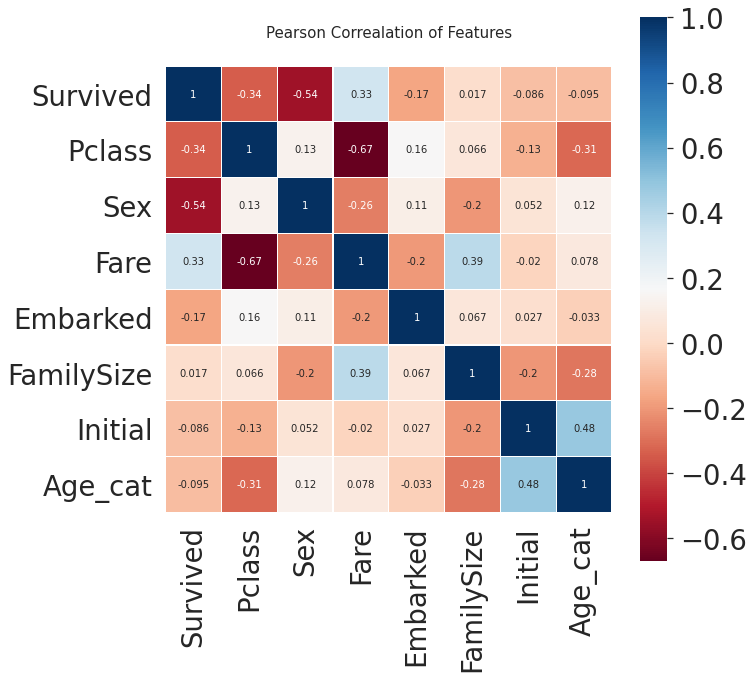

In [63]:
colormap = plt.cm.RdBu
# matplotlib cm
plt.figure(figsize=(10, 10))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='White', annot=True)
# astype 형변환, corr은 변수간 상관관계 다 구해주는 것! -> 0 선형관계없음, 양수 비례, 음수 반비례
# lineweidths 선굵기, linecolor 선색, annot 네모에 숫자표기
# 프로젝트에서 중점적으로 다뤄야하는 것이 될수도!


In [64]:
#one hot encoding

In [65]:
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
#prefix를 쓰면 Initial Column이 날라간다.
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,892,3,"Kelly, Mr. James",1,0,0,330911,2.057860,NaN,1,3.0,0,0,1,0,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,1.945910,NaN,2,4.0,0,0,0,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,2.270836,NaN,1,6.0,0,0,1,0,0,0,1,0
3,895,3,"Wirz, Mr. Albert",1,0,0,315154,2.159003,NaN,1,2.0,0,0,1,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,2.508582,NaN,3,2.0,0,0,0,1,0,0,0,1


In [66]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


In [67]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_train.head()


,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [68]:
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3.0,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4.0,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6.0,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2.0,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2.0,0,0,0,1,0,0,0,1


In [69]:
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트
from sklearn import metrics                         #
from sklearn.model_selection import train_test_split#Train set, Valid set, Test set -> Train, Valid 나눠주는 기능
df_train.shape

(891, 14)

In [70]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values
X_train.shape

(891, 13)

In [71]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)
#test_size = Valid로 30%를 주고 70%f를 Train으로 준다.
X_tr.shape

(623, 13)

In [72]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr) # X train과 y train으로 학습을 시킨다 랜덤 포레스트

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
prediction = model.predict(X_vld)
X_vld.shape

(268, 13)

In [74]:
prediction

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1])

In [75]:
print('총 {}명 중 {:.2f}% 정확도로 생존 맞춤'.format(y_vld.shape[0], 100*metrics.accuracy_score(prediction, y_vld)))
# y_vld.shape[0] = 268명, metrics.acc.. (prediction, y_vld) 비교

총 268명 중 83.21% 정확도로 생존 맞춤


In [76]:
(prediction == y_vld).sum()/y_vld.shape[0]
# Ture, False 배열 쭉 나열됨 0.83582

0.832089552238806

In [77]:
from pandas import Series
model.feature_importances_
# sklearn은 학습 시킨 model에 대하여 feature_importances_ 를 가지고 있다.

array([0.0956251 , 0.09613367, 0.33135786, 0.09730637, 0.12001253,
       0.01497894, 0.04039774, 0.12835704, 0.02785923, 0.00488594,
       0.01290223, 0.01220702, 0.01797632])

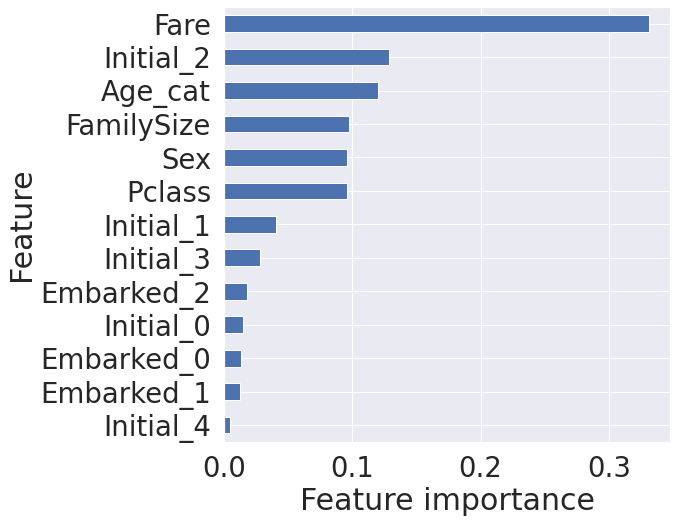

In [78]:
#학습시킨 모델에서 결과와 가장 관계가있는 feature
feature_importances = model.feature_importances_
plt.figure(figsize=(8,8))
Series_feat_imp = Series(feature_importances, index = df_test.columns)
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [79]:
#이제 진짜 test 셋을 이용해보자
submission = pd.read_csv('../input/titanic/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [80]:
prediction = model.predict(X_test)

In [81]:
submission['Survived'] = prediction

In [82]:
submission.to_csv('./my_first_submission2.csv', index=False)